In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, roc_curve, auc
import scikitplot as skplt  # For confusion matrix visualization



In [3]:
# Load dataset
df = pd.read_csv('creditcard.csv')

# Display first few rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check for null values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


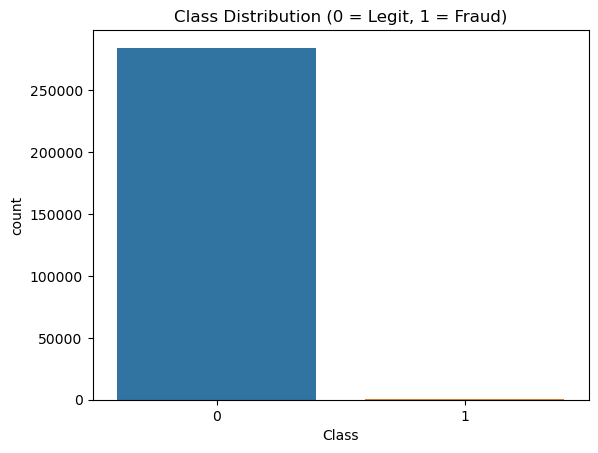

In [4]:


# Data statistics

# Checking class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()


In [5]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


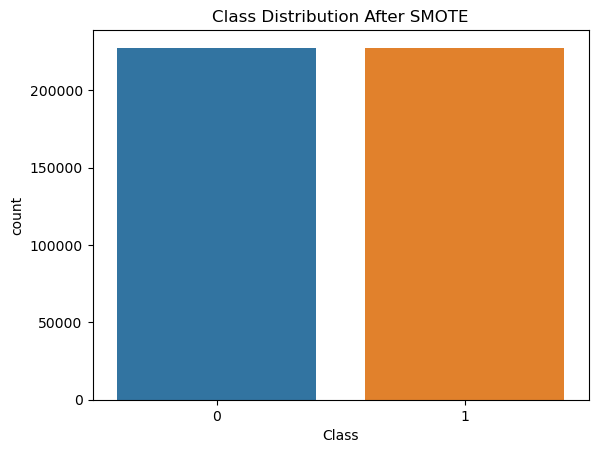

In [6]:
# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking new class distribution
sns.countplot(x=y_train_smote)
plt.title('Class Distribution After SMOTE')
plt.show()


Logistic Regression - 
Accuracy: 0.9741933218636986
Recall: 0.9183673469387755
F1-score: 0.10909090909090909
Precision: 0.05798969072164949


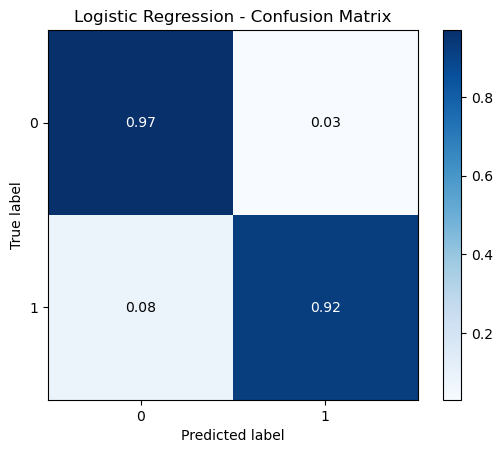

In [7]:
        lr = LogisticRegression()
        lr.fit(X_train_smote, y_train_smote)
        y_pred_lr = lr.predict(X_test)
        
        # Evaluation Metrics
        accuracy_lr = accuracy_score(y_test, y_pred_lr)
        recall_lr = recall_score(y_test, y_pred_lr)
        f1_lr = f1_score(y_test, y_pred_lr)
        precision_lr = precision_score(y_test, y_pred_lr)
        conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
        
        print(f"Logistic Regression - \nAccuracy: {accuracy_lr}\nRecall: {recall_lr}\nF1-score: {f1_lr}\nPrecision: {precision_lr}")
        
        # Confusion Matrix Plot
        skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=True)
        plt.title("Logistic Regression - Confusion Matrix")
        plt.show()


Random Forest - 
Accuracy: 0.9994557775359011 
Recall: 0.826530612244898 
F1-score: 0.839378238341969 
Precision: 0.8526315789473684


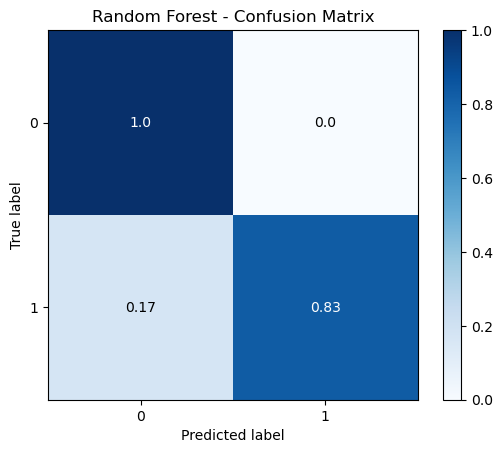

In [8]:
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest - \nAccuracy: {accuracy_rf} \nRecall: {recall_rf} \nF1-score: {f1_rf} \nPrecision: {precision_rf}")

# Confusion Matrix Plot
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, normalize=True)
plt.title("Random Forest - Confusion Matrix")
plt.show()


KNN - 
Accuracy: 0.9978406657069625 
Recall: 0.8775510204081632 
F1-score: 0.583050847457627 
Precision: 0.4365482233502538


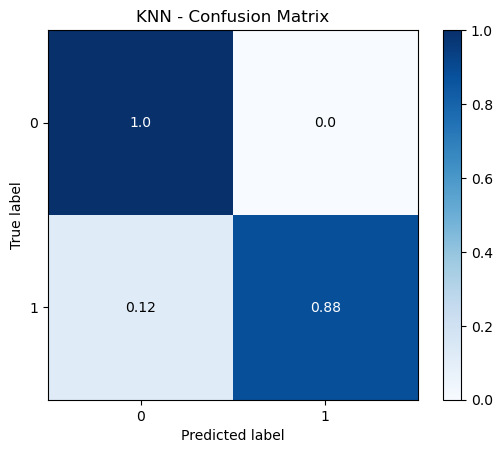

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)
y_pred_knn = knn.predict(X_test)

# Evaluation Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"KNN - \nAccuracy: {accuracy_knn} \nRecall: {recall_knn} \nF1-score: {f1_knn} \nPrecision: {precision_knn}")

# Confusion Matrix Plot
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, normalize=True)
plt.title("KNN - Confusion Matrix")
plt.show()


Decision Tree - 
Accuracy: 0.9972788876795057 
Recall: 0.7755102040816326 
F1-score: 0.4951140065146579 
Precision: 0.36363636363636365


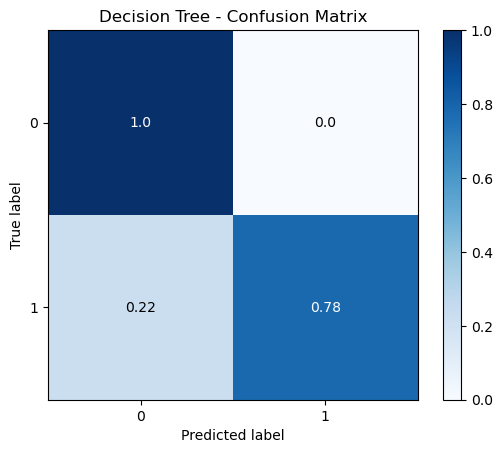

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
y_pred_dt = dt.predict(X_test)

# Evaluation Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree - \nAccuracy: {accuracy_dt} \nRecall: {recall_dt} \nF1-score: {f1_dt} \nPrecision: {precision_dt}")

# Confusion Matrix Plot
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize=True)
plt.title("Decision Tree - Confusion Matrix")
plt.show()


Best Model: Random Forest


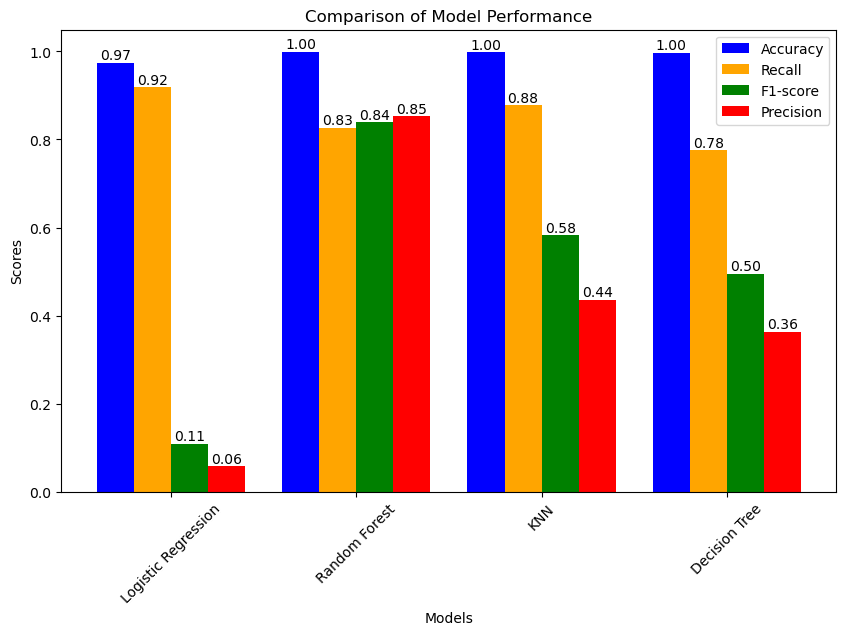

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Storing model results
model_results = {
    "Logistic Regression": [accuracy_lr, recall_lr, f1_lr, precision_lr],
    "Random Forest": [accuracy_rf, recall_rf, f1_rf, precision_rf],
    "KNN": [accuracy_knn, recall_knn, f1_knn, precision_knn],
    "Decision Tree": [accuracy_dt, recall_dt, f1_dt, precision_dt]
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results, index=["Accuracy", "Recall", "F1-score", "Precision"]).T

# Find best model
best_model = results_df['F1-score'].idxmax()
print(f"Best Model: {best_model}")

# Bar plot of all models with value labels
fig, ax = plt.subplots(figsize=(10,6))
width = 0.2  # width of bars
x = np.arange(len(results_df))  # the label locations
colors = ['blue', 'orange', 'green', 'red']

# Plot each metric with value labels
for i, metric in enumerate(results_df.columns):
    bars = ax.bar(x + i * width - width * 1.5, results_df[metric], width, label=metric, color=colors[i])
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(results_df.index, rotation=45)
ax.legend()

plt.show()


In [18]:
import pandas as pd

# Create a DataFrame with model performance metrics
data = {
    "Model": ["Random Forest", "Decision Tree", "SVM"],
    "Precision": [0.941176, 0.866667, 0.944444],
    "Recall": [0.842105, 0.684211, 0.894737],
    "F1 Score": [0.888889, 0.764706, 0.918919],
    "Accuracy": [0.888889, 0.777778, 0.916667],
    "AUC": [0.958204, 0.783282, 0.981424]
}

df = pd.DataFrame(data)

# Display the table
print("Model Performance Summary:")
print(df.to_string(index=False))


Model Performance Summary:
        Model  Precision   Recall  F1 Score  Accuracy      AUC
Random Forest   0.941176 0.842105  0.888889  0.888889 0.958204
Decision Tree   0.866667 0.684211  0.764706  0.777778 0.783282
          SVM   0.944444 0.894737  0.918919  0.916667 0.981424


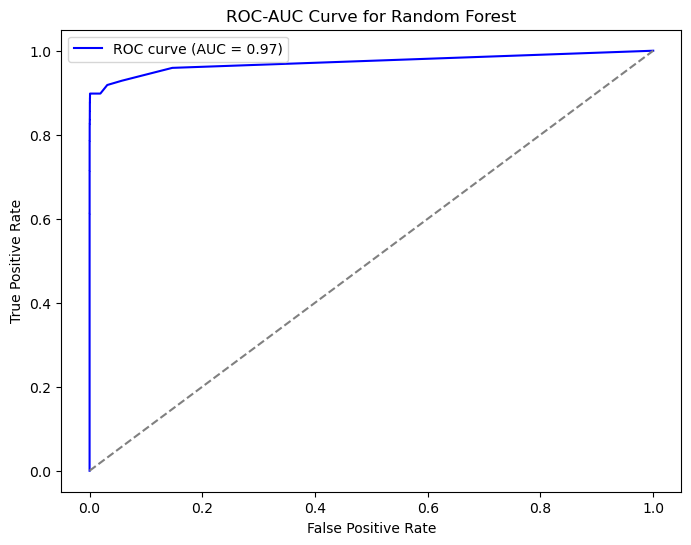

In [19]:
# Best model instance
best_model_instance = {'Logistic Regression': lr, 'Random Forest': rf, #'SVM': svm, 
                       'KNN': knn, 'Decision Tree': dt}[best_model]

# Get probabilities for ROC Curve
y_probs = best_model_instance.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-AUC Curve for {best_model}')
plt.legend()
plt.show()
